In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()


Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: 8c7aace999e0e0387a206568f4c15b02
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43446 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11170')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43436 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11170')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43448 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11170')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43458 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11170')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43462 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11170')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43454 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11170')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43438 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11170')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43443 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11170')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43461 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11170')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43468 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11170')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43460 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11170')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43463 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11170')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 43450 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11170')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: f0d44a9672a1752fd8a311510d2c64a4
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

### ————————合并需要分析的细胞类型————————

In [13]:
# # 读取数据
# Endothelial <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Endothelial/Outdata/Sub_annotion.qs")
# Epithelial <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Epithelial/Outdata/Sub_annotion.qs")
# Fibroblast <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Fibroblast/Outdata/Sub_annotion.qs")

# NK_cells <- qread("/home/guoliming/Brown/ALI_CRL/ALI/NK cells/Outdata/Sub_annotion.qs")
# Neutrophils <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Neutrophils/Outdata/Sub_annotion.qs")
# Macrophages <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Macrophages/Outdata/Sub_annotion.qs")

# # 挑选指定 celltype
# endo_sub <- subset(Endothelial, subset = celltype %in% c("Endothelial_c3", "Endothelial_c4"))
# epi_sub  <- subset(Epithelial, subset = celltype %in% c("Epithelial_c1","Epithelial_c10"))
# fib_sub  <- subset(Fibroblast, subset = celltype %in% c("Fibroblast_c0", "Fibroblast_c9", "Fibroblast_c10"))

# nk_sub <- subset(NK_cells, subset = celltype %in% c("NK_c1", "NK_c5"))
# neu_sub  <- subset(Neutrophils, subset = celltype %in% c("Neutrophils_c2","Neutrophils_c5"))
# mac_sub  <- subset(Macrophages, subset = celltype %in% c("Macrophages_c1", "Macrophages_c2", "Macrophages_c7", "Macrophages_c9", "Macrophages_c10","Macrophages_c11", "Macrophages_c12"))

# # 合并为一个新的 Seurat 对象
# seurat.data <- merge(endo_sub, y = list(epi_sub, fib_sub,nk_sub,neu_sub,mac_sub), project = "ALI_Selected")

# # 检查结果
# table(seurat.data$celltype)



 Endothelial_c3  Endothelial_c4   Epithelial_c1  Epithelial_c10   Fibroblast_c0 
            287             135             199              29             476 
 Fibroblast_c10   Fibroblast_c9  Macrophages_c1 Macrophages_c10 Macrophages_c11 
             88              98            1772              69              51 
Macrophages_c12  Macrophages_c2  Macrophages_c7  Macrophages_c9  Neutrophils_c2 
             26             672             210              91             915 
 Neutrophils_c5           NK_c1           NK_c5 
            120             673              60 

In [12]:
# seurat.data = qread("Combined_Selected_Celltypes.qs")

In [14]:
# seurat.data <- NormalizeData(object = seurat.data, normalization.method = "LogNormalize", scale.factor = 10000)

In [16]:
# 2.5 保存数据
# qsave(seurat.data, file = "Combined_Selected_Celltypes.qs")

### ————————合并需要分析的细胞类型————————

In [6]:
#remotes::install_github("sqjin/CellChat")
library(CellChat)
library(patchwork)
library(Seurat)
# library(SeuratData)
library(qs)
# AvailableData()
# InstallData("pbmc3k")

In [7]:
seurat.data = qread("Combined_Selected_Celltypes.qs")

# Part I：CellChat对象的数据输入、处理和初始化

In [8]:
CellChat需要输入两部分数据：

一是单细胞的基因表达数据（例如用Seurat包的normalizeData后的data数据，表达矩阵储存在seurat.data@assays$RNA@data）；
二是单细胞数据的meta.data，其中包含细胞类型的注释信息。
下面加载Seurat自带的PMBC单细胞数据作为演示：

ERROR: Error in parse(text = input): <text>:1:18: unexpected invalid token
1: CellChat需要输入两部分数据：
                     ^


In [9]:
# seurat.data = qread("/home/guoliming/Brown/ALI_CRL/ALI/immune/Outdata/Step3.Cluster_annotion.qs")

## Step1. 构建cellchat对象

In [10]:
seurat.data

An object of class Seurat 
34329 features across 1283 samples within 1 assay 
Active assay: RNA (34329 features, 0 variable features)
 2 layers present: counts, data

In [11]:
table(seurat.data@meta.data$celltype)


Endothelial_c3 Endothelial_c4  Epithelial_c1  Fibroblast_c0 Fibroblast_c10 
           287            135            199            476             88 
 Fibroblast_c9 
            98 

In [12]:
## 1.2 构建cellchat对象
#pbmc3k里的seurat_annotations有一些NA注释，过滤掉
data.input = seurat.data@assays$RNA@data
meta.data =  seurat.data@meta.data
meta.data = meta.data[!is.na(meta.data$celltype),]
data.input = data.input[,row.names(meta.data)]

#设置因子水平
meta.data$celltype = factor(meta.data$celltype,
                                    #   levels = c("Epithelial_c0", "Epithelial_c1", "Epithelial_c2", "Epithelial_c3", "Epithelial_c4", 
                                    #                 "Epithelial_c5", "Epithelial_c6", "Epithelial_c7", "Epithelial_c8", "Epithelial_c9")
                                                    )

### 1.3 Create a CellChat object
cellchat <- createCellChat(object = data.input, 
                           meta = meta.data, 
                           group.by = "celltype")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0 Fibroblast_c10 Fibroblast_c9 


和Seurat一样，如有需要的话，可在CellChat对象的meta插槽中添加表型信息，以及更改当前默认的idents：

In [13]:
###可在cellchat对象的meta插槽中添加表型信息
# 添加meta.data信息
cellchat <- addMeta(cellchat, meta = meta.data)

# 设置默认的labels
levels(cellchat@idents) # show factor levels of the cell labels
# cellchat <- setIdent(cellchat, ident.use = "new.labels") 
# groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "Endothelial_c3" "Endothelial_c4" "Epithelial_c1"  "Fibroblast_c0" 
[5] "Fibroblast_c10" "Fibroblast_c9"

## Step2. 加载CellChatDB数据库

CellChatDB数据库是一个人工管理的数据库，包含了人类和小鼠的文献支持的配体-受体相互作用。

小鼠包含2021种已验证的分子相互作用，包括60%的分泌自分泌/旁分泌信号互作、21%的细胞外基质(ECM)受体互作和19%的细胞-细胞通讯互作。
人类包含1939个已验证的分子相互作用，包括61.8%的旁分泌/自分泌信号互作、21.7%的细胞外基质(ECM)受体互作和16.5%的细胞-细胞通讯互作。
当然用户也可以通过添加自己精心策划的配体-受体对来更新CellChatDB（一般用的比较少），可参考https://htmlpreview.github.io/?https://github.com/sqjin/CellChat/blob/master/tutorial/Update-CellChatDB.html。

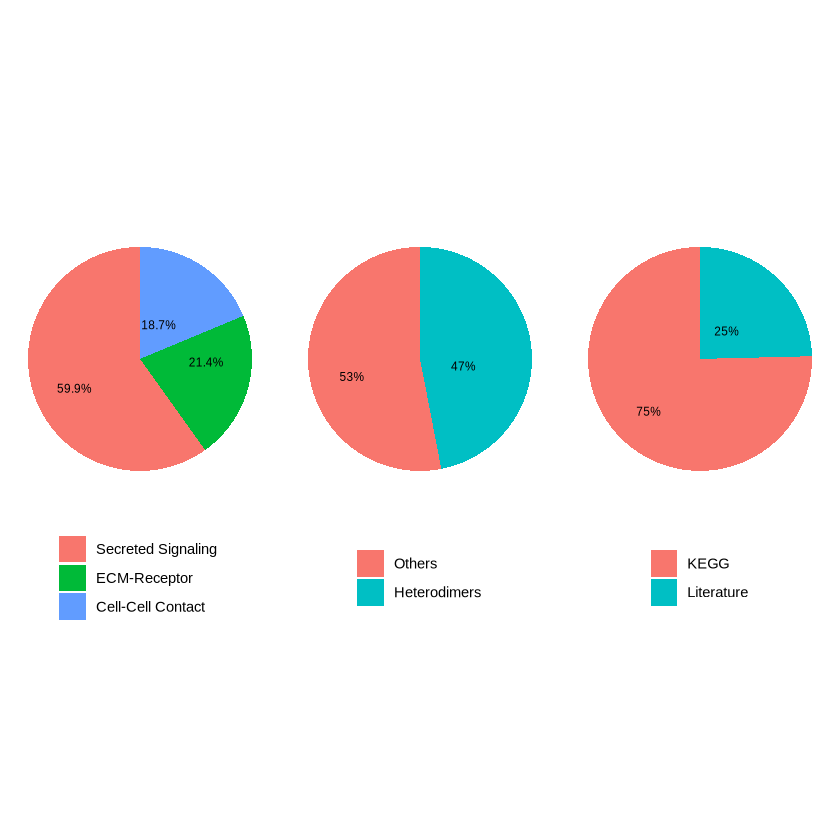

In [14]:
### 1.4 加载CellChat受配体数据库
# CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
CellChatDB <- CellChatDB.mouse # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)

In [15]:
# Show the structure of the database
dplyr::glimpse(CellChatDB$interaction)

Rows: 2,019
Columns: 11
$ interaction_name   <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2", "TGFB…
$ pathway_name       <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TG…
$ ligand             <chr> "Tgfb1", "Tgfb2", "Tgfb3", "Tgfb1", "Tgfb1", "Tgfb2…
$ receptor           <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1B_TGFb…
$ agonist            <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist", "TG…
$ antagonist         <chr> "TGFb antagonist", "TGFb antagonist", "TGFb antagon…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "TGFb inhibition receptor", "TGFb inhibition recept…
$ evidence           <chr> "KEGG: mmu04350", "KEGG: mmu04350", "KEGG: mmu04350…
$ annotation         <chr> "Secreted Signaling", "Secreted Signaling", "Secret…
$ interaction_name_2 <chr> "Tgfb1 - (Tgfbr1+Tgfbr2)", "Tgfb2  - (Tgfbr1+Tgfbr2…


In [16]:

# Fix "H2-BI" and "H2-Ea-ps" typo in CellChatDB.mouse
CellChatDB$interaction["H2-BI_KIR3DL1","interaction_name"] = "H2-BL_KIR3DL1"
CellChatDB$interaction["H2-BI_KIR3DL1","ligand"] = "H2-Bl"
CellChatDB$interaction["H2-BI_KIR3DL1","interaction_name_2"] = "H2-bl - Kir3dl1"
rownames(CellChatDB$interaction)[rownames(CellChatDB$interaction) == "H2-BI_KIR3DL1"] = "H2-BL_KIR3DL1"

CellChatDB$interaction["H2-EA-PS_CD4","interaction_name"] = "H2-EA_CD4"
CellChatDB$interaction["H2-EA-PS_CD4","ligand"] = "H2-Ea"
CellChatDB$interaction["H2-EA-PS_CD4","interaction_name_2"] = "H2-ea - Cd4"
rownames(CellChatDB$interaction)[rownames(CellChatDB$interaction) == "H2-EA-PS_CD4"] = "H2-EA_CD4"

In [17]:
# use a subset of CellChatDB for cell-cell communication analysis
#CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
CellChatDB.use <- CellChatDB # simply use the default CellChatDB
cellchat@DB <- CellChatDB.use

## Step3. 对表达数据进行预处理

为了推断细胞状态特异性通讯，我们在一个细胞群中识别过表达的配体或受体，然后在配体或受体过度表达时识别过表达的配体-受体相互作用。我们还提供了一种函数，将基因表达数据投影到蛋白质-蛋白质相互作用(PPI)网络。具体地说，一个扩散过程是用来平滑基因表达值基于他们的邻居定义在一个高置信度实验验证的蛋白质-蛋白质网络。当分析浅层测序深度的单细胞数据时，该函数是有用的，因为投影减少了信号基因的dropout效应，特别是配体/受体亚基可能的零表达。有人可能会担心这种扩散过程可能带来的人工制品，然而，它只会带来非常弱的通讯。用户也可以跳过此步骤并设置raw。在computeCommunProb()函数中使用= TRUE。

In [18]:
### 1.5 对表达数据进行预处理，用于细胞间通讯分析
# subset the expression data of signaling genes for saving computation cost
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
future::plan("multisession", workers = 2) # do parallel


# cellchat <- updateCellChat(cellchat) 如果报错Error in data.use[RsubunitsV, ] : subscript out of bounds)，执行这行代码

cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

# project gene expression data onto PPI (Optional: when running it, USER should set `raw.use = FALSE` in the function `computeCommunProb()` in order to use the projected data)
# cellchat <- projectData(cellchat, PPI.human)

# Part II：细胞-细胞通讯网络的推断

CellChat通过给每个相互作用赋一个概率值并进行排列测试来推断生物意义的细胞-细胞通讯。CellChat通过整合基因表达和信号配体、受体及其辅助因子之间相互作用的先验知识，利用质量作用定律来建模细胞-细胞间通讯的概率。推断出的配体-受体对的数目显然取决于计算每个细胞组平均基因表达的方法。默认情况下，CellChat使用一种统计上稳健的平均值方法，叫做trimean，它产生的交互比其他方法少。然而，我们发现，CellChat在预测更强的交互方面表现得很好，这对缩小交互范围进行进一步的实验验证非常有帮助。在computeCommunProb中，我们提供了使用其他方法(如5%和10%截断平均值)来计算平均基因表达的选项。值得注意的是，trimean近似于25%的截断平均值，这意味着如果一组中表达细胞的百分比小于25%，那么平均基因表达为零。要使用10%的截断平均值，用户可以设置type = "truncatedMean"和trim = 0.1。computeAveExpr函数可以帮助检查信号基因的平均表达，如computeAveExpr(cellchat, features = c("CXCL12"，"CXCR4")， type = "truncatedMean"， trim = 0.1)。在分析未排序的单细胞转录组时，在细胞数量丰富的群体比细胞数量稀少的群体更倾向于发出集体更强的信号的假设下，CellChat在概率计算中也可以考虑各细胞群体中细胞比例的影响。用户可以设置 population. size = TRUE.

## Step4. 计算通讯概率，推断细胞通讯网络

如果所研究的生物过程中已知的信号通路无法预测，用户可以尝试truncatedMean来改变计算每个细胞组平均基因表达的方法。

对于population. size参数的解读：是否考虑所有测序细胞中每组细胞的比例，

population. size = FALSE：如果分析分选富集的单细胞，以消除潜在的人为因素细胞群的大小。
population. size = TRUE，如果分析非分选富集的单细胞转录组，原因是丰富的细胞群往往比稀少的细胞群发送集体更强的信号。

In [19]:
cellchat <- computeCommunProb(cellchat,population.size = F)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-09-12 09:17:05.202985]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-09-12 10:50:12.02795]"


## Step5. 提取预测的细胞通讯网络为data frame

In [24]:
cellchat

An object of class CellChat created from a single dataset 
 34329 genes.
 1283 cells. 
CellChat analysis of single cell RNA-seq data! 

In [25]:
head(cellchat@meta)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
GSM8504081_ACCCTCACAACCGATT-1,GSM8504081,9617,2745,GSM8504081,ALI,3.400229,2,15,3,3,3,8,9,10,11,11,12,15,Endothelial_c3
GSM8504081_ACTGATGGTCGCATTA-1,GSM8504081,12099,3354,GSM8504081,ALI,4.091247,5,11,6,4,5,5,8,8,9,9,8,11,Endothelial_c4
GSM8504081_ACTGTGAAGTGCGCTC-1,GSM8504081,9981,2840,GSM8504081,ALI,3.697024,5,11,6,4,5,5,8,8,9,9,8,11,Endothelial_c4
GSM8504081_AGATCGTCACATGACT-1,GSM8504081,7263,2705,GSM8504081,ALI,3.387030,2,6,3,3,3,3,3,3,3,3,4,6,Endothelial_c3
GSM8504081_AGGATCTAGTTGAAAC-1,GSM8504081,5863,2128,GSM8504081,ALI,4.246973,5,11,6,4,5,5,8,8,9,9,8,11,Endothelial_c4
GSM8504081_AGGGAGTCAGGCACAA-1,GSM8504081,5141,2348,GSM8504081,ALI,4.979576,5,11,6,4,5,5,8,8,9,9,8,11,Endothelial_c4


In [26]:
#小技巧：如何取cellchat的子集？
### cellchat取子集
# barcode.use = sample(row.names(cellchat@meta),1000)
# cellchat.subset = subsetCellChat(cellchat,cells.use = barcode.use)

In [28]:
# 作者提供了函数subsetCommunication去提取用户感兴趣的配受体对强度为data.frame：
#获取所有的配受体对以及其通讯概率
df.net <- subsetCommunication(cellchat)
head(df.net)

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,Endothelial_c3,Endothelial_c3,Tgfb1,TGFbR1_R2,0.012547846,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
2,Endothelial_c4,Endothelial_c3,Tgfb1,TGFbR1_R2,0.012728496,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
3,Fibroblast_c0,Endothelial_c3,Tgfb1,TGFbR1_R2,0.001373602,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
4,Fibroblast_c10,Endothelial_c3,Tgfb1,TGFbR1_R2,0.003099333,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
5,Fibroblast_c9,Endothelial_c3,Tgfb1,TGFbR1_R2,0.001802408,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350
6,Endothelial_c3,Endothelial_c4,Tgfb1,TGFbR1_R2,0.006688273,0,TGFB1_TGFBR1_TGFBR2,Tgfb1 - (Tgfbr1+Tgfbr2),TGFb,Secreted Signaling,KEGG: mmu04350


In [29]:
#以通路为单位提取通讯信息
df.pathway = subsetCommunication(cellchat,slot.name = "netP")
head(df.pathway)

,source,target,pathway_name,prob,pval
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Endothelial_c3,Endothelial_c3,APP,0.085197191,0.00
2,Endothelial_c3,Endothelial_c3,BST2,0.007768793,0.00
3,Endothelial_c3,Endothelial_c3,CADM,0.002506504,0.00
4,Endothelial_c3,Endothelial_c3,CCL,0.140149308,0.01
5,Endothelial_c3,Endothelial_c3,CD39,0.005211756,0.00
6,Endothelial_c3,Endothelial_c3,CD80,0.038980220,0.00


In [30]:
levels(cellchat@idents)

[1] "Endothelial_c3" "Endothelial_c4" "Epithelial_c1"  "Fibroblast_c0" 
[5] "Fibroblast_c10" "Fibroblast_c9"

In [31]:
# 对感兴趣的细胞提取受配体信息
# 这里的 source.use = c(1) 指的是Naive CD4 T，2和3分别对应Memory CD4 T和CD14+ Mono：
df.net.sub <- subsetCommunication(cellchat, sources.use = c(1,2), targets.use = c(3))
head(df.net.sub)

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,Endothelial_c3,Epithelial_c1,Ccl6,Ccr2,0.002393914,0,CCL6_CCR2,Ccl6 - Ccr2,CCL,Secreted Signaling,KEGG: mmu04060
2,Endothelial_c4,Epithelial_c1,Ccl6,Ccr2,0.003644384,0,CCL6_CCR2,Ccl6 - Ccr2,CCL,Secreted Signaling,KEGG: mmu04060
3,Endothelial_c3,Epithelial_c1,Cxcl2,Cxcr2,0.036182579,0,CXCL2_CXCR2,Cxcl2 - Cxcr2,CXCL,Secreted Signaling,KEGG: mmu04060
4,Endothelial_c3,Epithelial_c1,Cxcl3,Cxcr2,0.003793640,0,CXCL3_CXCR2,Cxcl3 - Cxcr2,CXCL,Secreted Signaling,KEGG: mmu04060
5,Endothelial_c3,Epithelial_c1,Cxcl12,Cxcr4,0.002868005,0,CXCL12_CXCR4,Cxcl12 - Cxcr4,CXCL,Secreted Signaling,KEGG: mmu04060
6,Endothelial_c4,Epithelial_c1,Cxcl12,Cxcr4,0.001631453,0,CXCL12_CXCR4,Cxcl12 - Cxcr4,CXCL,Secreted Signaling,KEGG: mmu04060


In [32]:
# 对感兴趣的通路提取受配体信息
df.net.sub <- subsetCommunication(cellchat, signaling = c("CCL", "CXCL"))
head(df.net.sub)

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,Epithelial_c1,Endothelial_c3,Ccl5,Ccr1,0.08633143,0,CCL5_CCR1,Ccl5 - Ccr1,CCL,Secreted Signaling,KEGG: mmu04060
2,Fibroblast_c0,Endothelial_c3,Ccl5,Ccr1,0.07013712,0,CCL5_CCR1,Ccl5 - Ccr1,CCL,Secreted Signaling,KEGG: mmu04060
3,Fibroblast_c10,Endothelial_c3,Ccl5,Ccr1,0.10145246,0,CCL5_CCR1,Ccl5 - Ccr1,CCL,Secreted Signaling,KEGG: mmu04060
4,Fibroblast_c9,Endothelial_c3,Ccl5,Ccr1,0.06673138,0,CCL5_CCR1,Ccl5 - Ccr1,CCL,Secreted Signaling,KEGG: mmu04060
5,Epithelial_c1,Fibroblast_c0,Ccl5,Ccr1,0.02282475,0,CCL5_CCR1,Ccl5 - Ccr1,CCL,Secreted Signaling,KEGG: mmu04060
6,Fibroblast_c10,Fibroblast_c0,Ccl5,Ccr1,0.02715310,0,CCL5_CCR1,Ccl5 - Ccr1,CCL,Secreted Signaling,KEGG: mmu04060


In [33]:
qsave(cellchat, file = "CellChat_Res.qs")

## Step6. 在信号通路水平推断细胞通讯

In [ ]:
CellChat通过汇总与每个信号通路相关的所有配体-受体相互作用的通讯概率，计算信号通路层面的通讯概率。

注意：推断出的每个配体-受体对的细胞间通讯网络和每个信号通路分别存储在' net '和' netP '插槽中。

In [34]:
cellchat <- computeCommunProbPathway(cellchat)
head(cellchat@net)

$prob
, , TGFB1_TGFBR1_TGFBR2

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3    0.012547846   0.0066882733             0             0
Endothelial_c4    0.012728496   0.0067894453             0             0
Epithelial_c1     0.000000000   0.0000000000             0             0
Fibroblast_c0     0.001373602   0.0007304201             0             0
Fibroblast_c10    0.003099333   0.0016490196             0             0
Fibroblast_c9     0.001802408   0.0009587563             0             0
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3              0             0
Endothelial_c4              0             0
Epithelial_c1               0             0
Fibroblast_c0               0             0
Fibroblast_c10              0             0
Fibroblast_c9               0             0

, , TGFB2_TGFBR1_TGFBR2

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3    0.000000000     0.00000000             0             0
Endothelial_c4    0.000000000     0.00000000             0             0
Epithelial_c1     0.000000000     0.00000000             0             0
Fibroblast_c0     0.000000000     0.00000000             0             0
Fibroblast_c10    0.002951981     0.00157053             0             0
Fibroblast_c9     0.002131199     0.00113385             0             0
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3              0             0
Endothelial_c4              0             0
Epithelial_c1               0             0
Fibroblast_c0               0             0
Fibroblast_c10              0             0
Fibroblast_c9               0             0

, , TGFB3_TGFBR1_TGFBR2

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3              0              0             0             0
Endothelial_c4              0              0             0             0
Epithelial_c1               0              0             0             0
Fibroblast_c0               0              0             0             0
Fibroblast_c10              0              0             0             0
Fibroblast_c9               0              0             0             0
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3              0             0
Endothelial_c4              0             0
Epithelial_c1               0             0
Fibroblast_c0               0             0
Fibroblast_c10              0             0
Fibroblast_c9               0             0

, , TGFB1_ACVR1B_TGFBR2

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3              0              0             0             0
Endothelial_c4              0              0             0             0
Epithelial_c1               0              0             0             0
Fibroblast_c0               0              0             0             0
Fibroblast_c10              0              0             0             0
Fibroblast_c9               0              0             0             0
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3              0             0
Endothelial_c4              0             0
Epithelial_c1               0             0
Fibroblast_c0               0             0
Fibroblast_c10              0             0
Fibroblast_c9               0             0

, , TGFB1_ACVR1C_TGFBR2

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3              0              0             0             0
Endothelial_c4              0              0             0             0
Epithelial_c1               0              0             0             0
Fibroblast_c0               0              0             0             0
Fibroblast_c10              0              0             0             0
Fibroblast_c9               0              0             0             0
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3              0     

In [35]:
head(cellchat@netP)

$pathways
 [1] "COLLAGEN"    "APP"         "THBS"        "LAMININ"     "FN1"        
 [6] "ICAM"        "CCL"         "COMPLEMENT"  "GALECTIN"    "ANNEXIN"    
[11] "JAM"         "ITGAL-ITGB2" "CDH5"        "PECAM1"      "SEMA3"      
[16] "MIF"         "ESAM"        "VEGF"        "CXCL"        "TENASCIN"   
[21] "CSF"         "RESISTIN"    "TNF"         "PTPRM"       "SPP1"       
[26] "PARs"        "SEMA6"       "UGRP1"       "KIT"         "SEMA4"      
[31] "ADIPONECTIN" "TGFb"        "OSM"         "CD80"        "SEMA7"      
[36] "VISFATIN"    "BST2"        "EPHB"        "GAS"         "CSF3"       
[41] "GRN"         "NOTCH"       "HSPG"        "CADM"        "AGRN"       
[46] "CD39"        "WNT"         "FGF"         "LAIR1"       "BMP"        
[51] "PROS"        "TWEAK"       "VWF"         "EPHA"        "EDN"        
[56] "NECTIN"     

$prob
, , COLLAGEN

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3      0.5936692      0.3884950    0.16942771     0.2440748
Endothelial_c4      0.4801726      0.3119801    0.11775460     0.1961276
Epithelial_c1       0.0000000      0.0000000    0.00000000     0.0000000
Fibroblast_c0       0.4383510      0.2700488    0.09046756     0.1663484
Fibroblast_c10      0.7332585      0.4214504    0.14675505     0.2457164
Fibroblast_c9       1.0949586      0.6665204    0.24162625     0.3852933
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3      0.3431823     0.4090732
Endothelial_c4      0.2775678     0.3299482
Epithelial_c1       0.0000000     0.0000000
Fibroblast_c0       0.2309338     0.2784376
Fibroblast_c10      0.3867284     0.4644063
Fibroblast_c9       0.5829479     0.7011551

, , APP

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3     0.08519719     0.11462564    0.12244563    0.10228259
Endothelial_c4     0.00000000     0.10245765    0.10955023    0.09128977
Epithelial_c1      0.00000000     0.00000000    0.00000000    0.00000000
Fibroblast_c0      0.00000000     0.00000000    0.00000000    0.00000000
Fibroblast_c10     0.00000000     0.00000000    0.09295514    0.00000000
Fibroblast_c9      0.00000000     0.08964794    0.09594857    0.00000000
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3     0.12104545     0.1675867
Endothelial_c4     0.10827931     0.1507539
Epithelial_c1      0.00000000     0.0000000
Fibroblast_c0      0.00000000     0.1000763
Fibroblast_c10     0.09185688     0.1288201
Fibroblast_c9      0.09481865     0.1327994

, , THBS

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3   0.2078225825      0.2021810    0.06955342    0.09490292
Endothelial_c4   0.0004113961      0.0000000    0.00000000    0.00000000
Epithelial_c1    0.0000000000      0.0000000    0.00000000    0.00000000
Fibroblast_c0    0.0103959030      0.0000000    0.00000000    0.00000000
Fibroblast_c10   0.1744632388      0.1698507    0.05801765    0.07920377
Fibroblast_c9    0.0000000000      0.0000000    0.00000000    0.00000000
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3      0.2011008  0.1911407942
Endothelial_c4      0.0000000  0.0001798974
Epithelial_c1       0.0000000  0.0000000000
Fibroblast_c0       0.0000000  0.0009434317
Fibroblast_c10      0.1685075  0.1599970714
Fibroblast_c9       0.0000000  0.0000000000

, , LAMININ

               Endothelial_c3 Endothelial_c4 Epithelial_c1 Fibroblast_c0
Endothelial_c3     0.08396757     0.05944713   0.014208148   0.015756140
Endothelial_c4     0.03671571     0.02597161   0.006208093   0.006885744
Epithelial_c1      0.00000000     0.00000000   0.000000000   0.000000000
Fibroblast_c0      0.00000000     0.00000000   0.000000000   0.000000000
Fibroblast_c10     0.06592088     0.04674849   0.011170468   0.012383042
Fibroblast_c9      0.42204915     0.30108884   0.071880689   0.079579395
               Fibroblast_c10 Fibroblast_c9
Endothelial_c3     0.01604201   0.026196023
Endothelial_c4     0.00161248   0.

## Step7. 计算加和的cell-cell通讯网络

我们可以通过计算links数或总结细胞通讯概率来计算加和的cell-cell通讯网络。用户还可以通过设置sources.use 和targets.use来计算细胞亚群之间的加和网络。

In [36]:
cellchat <- aggregateNet(cellchat)

然后，我们还可以可视化加和的细胞间通讯网络。例如，使用circle plot显示任意两个细胞亚群之间的通讯次数或总通讯强度(权重)：

## 绘图

In [2]:
#remotes::install_github("sqjin/CellChat")
library(CellChat)
library(patchwork)
library(Seurat)
# library(SeuratData)
library(qs)
# AvailableData()
# InstallData("pbmc3k")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



In [3]:
cellchat = qread(file = "CellChat_Res_2.qs")

In [4]:
cellchat@net$count

,Endothelial_c3,Endothelial_c4,Epithelial_c1,Epithelial_c10,Fibroblast_c0,Fibroblast_c10,Fibroblast_c9,Macrophages_c1,Macrophages_c10,Macrophages_c11,Macrophages_c12,Macrophages_c2,Macrophages_c7,Macrophages_c9,Neutrophils_c2,Neutrophils_c5,NK_c1,NK_c5
Endothelial_c3,101,94,29,59,33,42,57,35,60,34,57,85,42,80,28,38,32,44
Endothelial_c4,78,66,15,39,18,25,36,25,35,21,37,63,27,56,20,26,27,28
Epithelial_c1,16,10,1,10,3,6,9,4,10,5,12,14,8,11,7,8,8,9
Epithelial_c10,73,71,24,47,27,35,46,31,45,26,48,67,37,59,21,31,29,37
Fibroblast_c0,50,43,14,28,17,22,36,15,31,13,24,50,16,40,13,15,22,24
Fibroblast_c10,79,70,24,48,25,38,53,35,52,29,46,79,38,67,27,34,39,42
Fibroblast_c9,102,92,32,61,34,47,64,33,60,37,47,91,34,81,28,36,41,45
Macrophages_c1,30,26,6,18,9,16,23,18,24,13,25,35,21,29,13,16,14,16
Macrophages_c10,63,53,23,40,25,32,40,36,43,38,58,64,44,59,33,46,31,46
Macrophages_c11,31,27,6,18,7,12,19,16,21,14,19,33,19,25,10,16,13,14


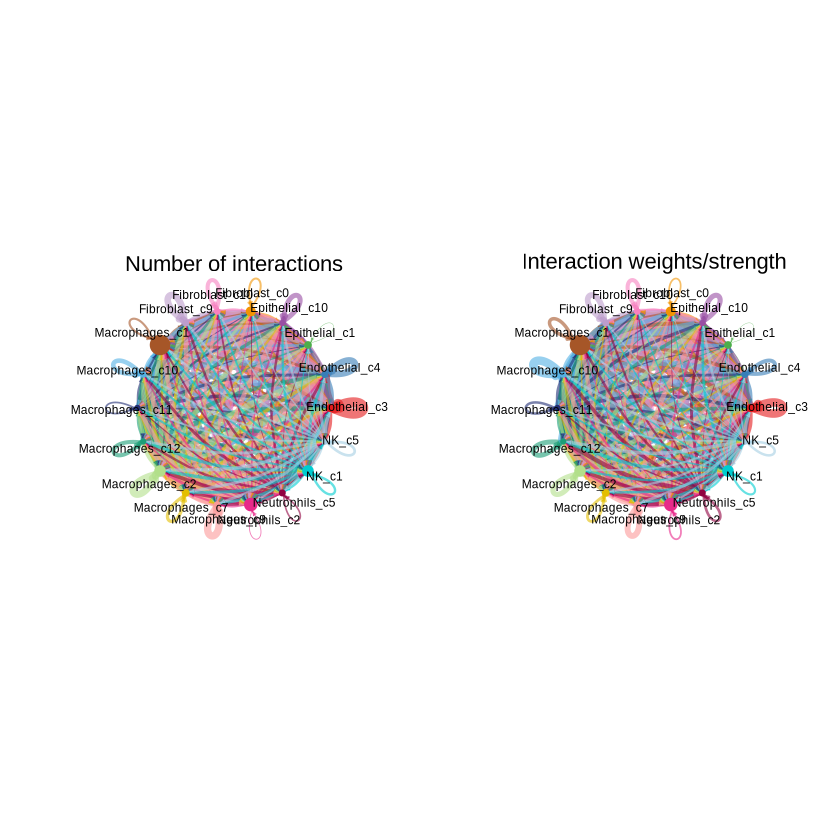

In [29]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
p1 = netVisual_circle(cellchat@net$count, vertex.weight = groupSize,
                 weight.scale = T, label.edge= F,
                 title.name = "Number of interactions",
                 vertex.label.cex = 0.6)
p2 = netVisual_circle(cellchat@net$weight, vertex.weight = groupSize,
                 weight.scale = T, label.edge= F,
                 title.name = "Interaction weights/strength",
                 vertex.label.cex = 0.6)

In [30]:
pdf("circle_plot_p1.pdf", width = 12, height = 12) # 放大画布
print(p1)
dev.off()
pdf("circle_plot_p2.pdf", width = 12, height = 12) # 放大画布
print(p2)
dev.off()


agg_record_1442804718 
                    2

agg_record_1442804718 
                    2

In [ ]:
由于细胞间通讯网络的复杂性，我们可以对每个细胞亚群发出的信号进行检测。这里我们还控制参数edge.weight.max，以便我们可以比较不同网络之间的边权值：

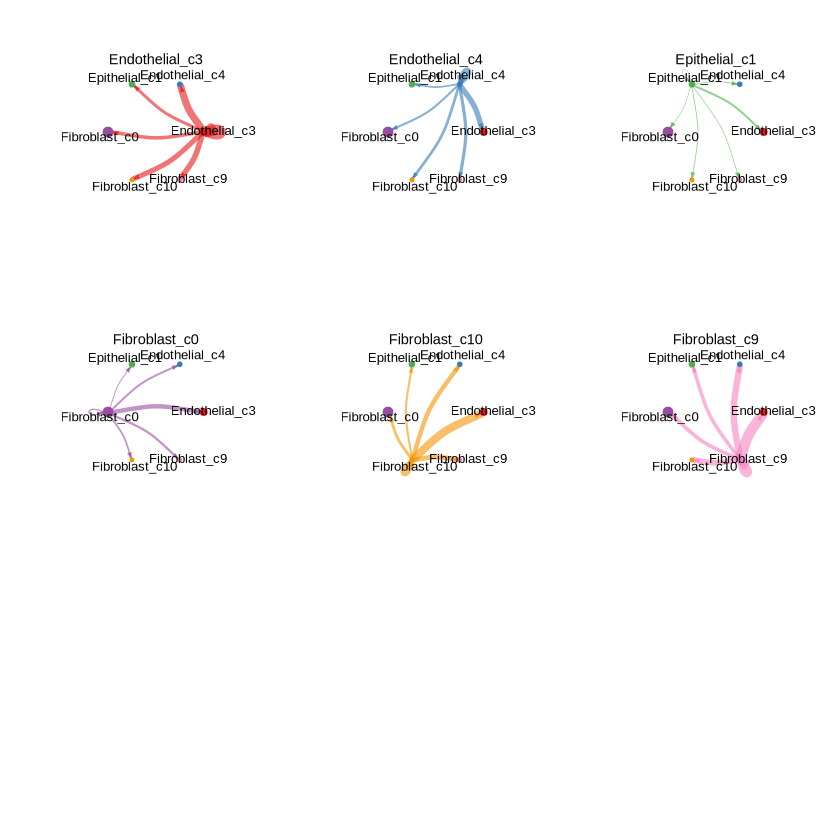

In [38]:
mat <- cellchat@net$weight
par(mfrow = c(3,3), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  p1 = netVisual_circle(mat2, vertex.weight = groupSize,
                   weight.scale = T, edge.weight.max = max(mat),
                   title.name = rownames(mat)[i])
}

In [26]:
# qsave(cellchat, file = "CellCha_Res.qs")

从这里开始，以上代码和函数均为得到细胞通讯网络。接下来，作者围绕细胞层面，通路层面和基因层面等，开发了一系列的可视化函数供用户进行数据探索。

## Step13. 识别细胞亚群的信号作用（例如主要的发送者，接收者）以及主要的贡献信号

CellChat通过计算每个细胞组的若干网络中心性度量，可以随时识别细胞间通信网络中的主要的发送者（senders）、接收者（receivers）、中介（mediators）和影响者（influencers）。具体而言，作者使用加权定向网络中的指标，包括向外程度、向内程度、流动间度和信息中心性，分别识别细胞间通信的主导发送者、接收者、中介和影响者。在以权值为计算通信概率的加权有向网络中，小区组出方向信号的出度和入方向信号的入方向信号的出度分别用来识别信号网络中占主导地位的小区发送方和接收方。关于流间性和信息中心性的定义，请查阅作者的论文和相关参考资料。

### 13.1 计算并可视化网络中心性得分

netAnalysis_computeCentrality函数基于netP插槽，计算网络中心性得分，然后进行可视化：

In [5]:
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
cellchat@netP$pathways
# pathways.show = "CXCL"
# netAnalysis_signalingRole_network(cellchat,
#                                   signaling = pathways.show,
#                                   width = 8, height = 2.5,
#                                   font.size = 10)

[1] "COLLAGEN"    "CCL"         "FN1"         "COMPLEMENT"  "ICAM"       
 [6] "THBS"        "ANNEXIN"     "APP"         "MIF"         "CXCL"       
[11] "GALECTIN"    "ITGAL-ITGB2" "LAMININ"     "SELPLG"      "CD45"       
[16] "JAM"         "TNF"         "SPP1"        "SEMA4"       "GRN"        
[21] "TGFb"        "MHC-I"       "SELL"        "VISFATIN"    "SEMA3"      
[26] "THY1"        "CSF"         "BST2"        "UGRP1"       "CD80"       
[31] "VEGF"        "PECAM1"      "LAIR1"       "RESISTIN"    "CDH5"       
[36] "ANXA1"       "ANGPTL"      "CD39"        "GAS"         "CD22"       
[41] "OSM"         "ESAM"        "PARs"        "IFN-II"      "ADIPONECTIN"
[46] "NOTCH"       "CHEMERIN"    "CD200"       "PROS"        "TENASCIN"   
[51] "CD34"        "IL1"         "FASLG"       "CSF3"        "SEMA6"      
[56] "CLEC"        "PTPRM"       "KIT"         "SEMA7"       "SN"         
[61] "IL6"         "L1CAM"       "EPHB"        "APRIL"       "ACTIVIN"    
[66] "BMP"         "GDF"         "CDH1"        "TWEAK"       "IL10"       
[71] "WNT"         "FGF"         "CD137"       "CADM"        "HSPG"       
[76] "IGF"         "AGRN"        "EDN"         "NKG2D"       "NGL"        
[81] "LIFR"        "HGF"         "VWF"         "NECTIN"      "NRG"        
[86] "EPHA"        "CDH"         "MAG"

### 13.2 在2D空间中可视化主要的发送者（source）和接收者（target）

作者还提供了另一种直观的方法，使用散点图在2D空间中可视化主要的发送方(source)和接收方(target)：

In [31]:
# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
gg1 <- netAnalysis_signalingRole_scatter(cellchat)+ggtitle("All pathway")

# options(repr.plot.width = 9, repr.plot.height = 9)
pdf("2d_scattor.pdf", width = 9, height = 9) # 放大画布
gg1
dev.off()


Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



agg_record_1917598841 
                    2

In [6]:
library(ComplexHeatmap)

# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing")
ht2 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming")

Loading required package: grid

ComplexHeatmap version 2.25.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Warning message:
“Heatmap/annotation names are duplicated: Relative strength”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
ERROR while rich displaying an object: Error in grid.Call.graphics(C_downvppath, name$

In [ ]:
library(CellChat)
library(ComplexHeatmap)
library(grid)

# 生成热图对象
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, font.size = 8, width = 10, height = 20, pattern = "incoming")

pdf("heatmap_incoming.pdf", width = 8, height = 12)
# 调整行名字体大小和行名显示宽度
draw(
  ht1
)
dev.off()

In [64]:
### Bubble plot
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
pdf("LR_Pairs_Bubble.pdf", width = 10, height = 20)
# options(repr.plot.width = 10, repr.plot.height = 20)
netVisual_bubble(cellchat, sources.use = 1, targets.use = c(2:17), remove.isolate = FALSE)
dev.off()   

Comparing communications on a single object 




agg_record_1587027834 
                    2

Comparing communications on a single object 




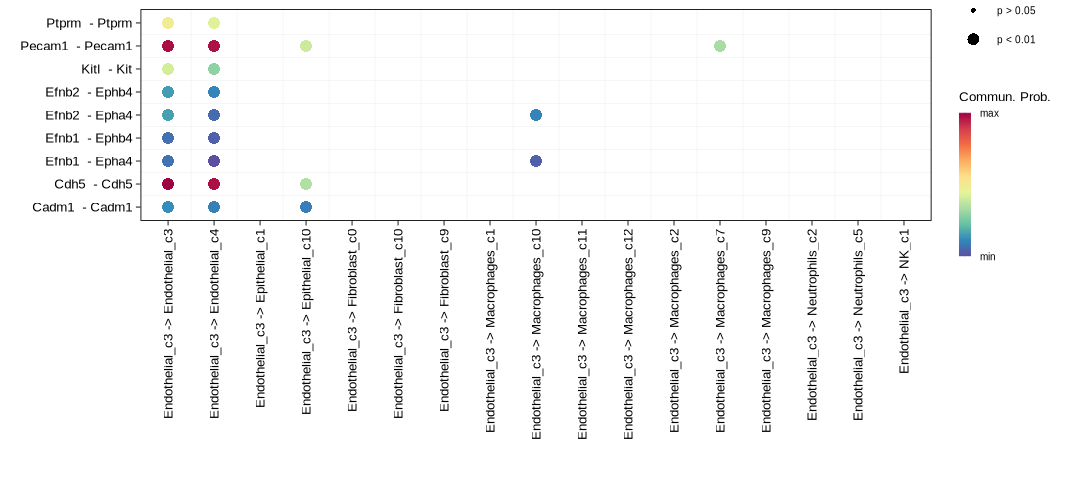

In [43]:
# show all the significant interactions (L-R pairs) associated with certain signaling pathways
netVisual_bubble(cellchat, sources.use = 1, targets.use = c(1:17), 
                 signaling = c("PECAM1","CDH5","PTPRM","KIT","EPHB","CADM"), remove.isolate = FALSE)
    #             signaling = c(
    #                 "TNF",
    # "IL1",
    # "CCL",
    # "CXCL",
    # "VEGF",
    # "PDGF",
    # "MHC-I",
    # "MHC-II",
    # "NOTCH"
    # ), remove.isolate = FALSE)

Signaling role analysis on the cell-cell communication network from user's input



Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


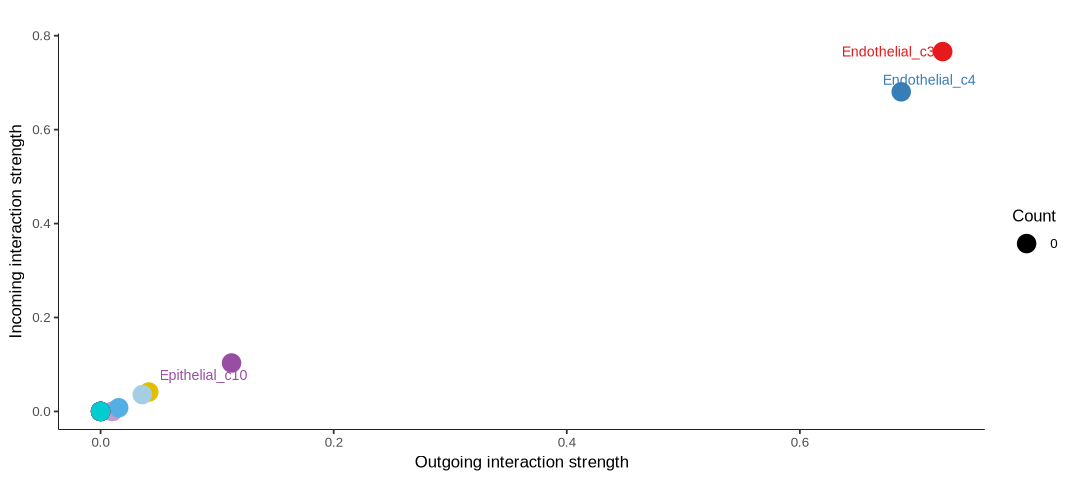

In [22]:
# 感兴趣的pathway
# Signaling role analysis on the cell-cell communication networks of interest
gg2 <- netAnalysis_signalingRole_scatter(cellchat, signaling = c("PECAM1","CDH5","PTPRM","KIT","EPHB","CADM"))+ggtitle("")

options(repr.plot.width = 9, repr.plot.height = 4)
gg2

In [33]:
## 当然也支持可视化指定的pathway：
# Signaling role analysis on the cell-cell communication networks of interest
sig1 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing",signaling = c("TNF",
    "IL1",
    "CCL",
    "CXCL",
    "VEGF",
    "PDGF",
    "MHC-I",
    "MHC-II",
    "NOTCH"
    # "PECAM1","CDH5","PTPRM","KIT","EPHB","CADM"
    ))
sig2 <- netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming",signaling = c("TNF",
    "IL1",
    "CCL",
    "CXCL",
    "VEGF",
    "PDGF",
    "MHC-I",
    "MHC-II",
    "NOTCH"
    # "PECAM1","CDH5","PTPRM","KIT","EPHB","CADM"
    ))

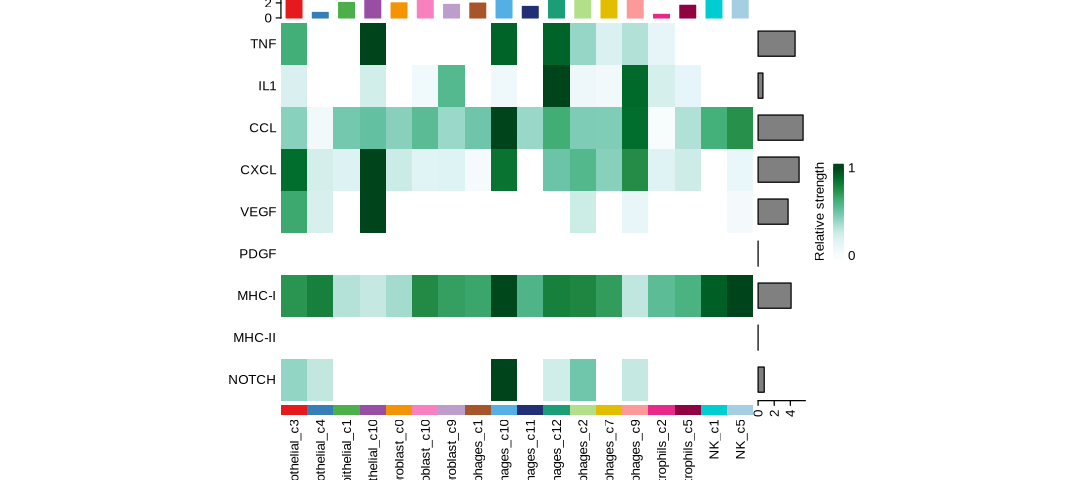

In [34]:
sig1

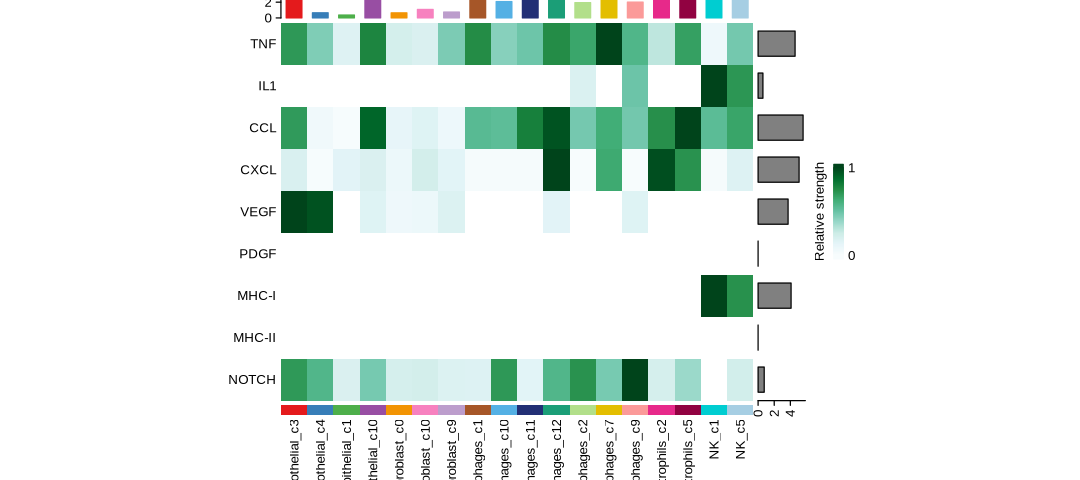

In [35]:
sig2

In [40]:
cellchat

An object of class CellChat created from a single dataset 
 34329 genes.
 5971 cells. 
CellChat analysis of single cell RNA-seq data! 